# Swift

## Language


- [Hacking with Swift Chapter 0](https://www.hackingwithswift.com/read/0/overview). This is a free book on iOS programming starting with an excellent guide to getting started with Swift
- [The Swift Book](https://docs.swift.org/swift-book/LanguageGuide/TheBasics.html). First introduced by Apple, now part of the open source Swift project, this is the official book on getting started with Swift.

In [71]:
for x in 0..<5 {
    print("A" + String(x))
}

A0
A1
A2
A3
A4


## Autodiff

In [72]:
// Reverse-mode differentiation
@differentiable
func f(_ x: Float) -> Float {
    x * x
}
let dfdx = gradient(of: f)
dfdx(3) // 6

6.0


In [73]:
// Forward-mode derivative, not ready in swift as of 2020-08
// ... https://stackoverflow.com/questions/61037711/got-a-fatal-error-saying-jvp-does-not-exist-differential-first-differentiation
@differentiable
func f(_ x: Float) -> Float {
    x * x
}
let dfdx = derivative(of: f)
dfdx(3) // 6

Fatal error: JVP does not exist. Use '-Xfrontend -enable-experimental-forward-mode-differentiation' to enable differential-first differentiation APIs.: file /swift-base/swift/stdlib/public/core/../Differentiation/DifferentiationUtilities.swift, line 131
Current stack trace:
0    libswiftCore.so                    0x00007f4578138140 swift_reportError + 50
1    libswiftCore.so                    0x00007f45781adab0 _swift_stdlib_reportFatalErrorInFile + 115
2    libswiftCore.so                    0x00007f4577e494a2 <unavailable> + 1533090
3    libswiftCore.so                    0x00007f4577e490e6 <unavailable> + 1532134
4    libswiftCore.so                    0x00007f4577e49685 <unavailable> + 1533573
5    libswiftCore.so                    0x00007f4577e47b00 _assertionFailure(_:_:file:line:flags:) + 528
6    libswiftCore.so                    0x00007f4578020577 <unavailable> + 3462519
9    repl_swift                         0x0000000000400470 <unavailable> + 1136


: ignored

<pre>Fatal error: JVP does not exist. Use '-Xfrontend -enable-experimental-forward-mode-differentiation' to enable differential-first differentiation APIs.: file /swift-base/swift/stdlib/public/core/../Differentiation/DifferentiationUtilities.swift, line 131
Current stack trace:
0    libswiftCore.so                    0x00007f16f3282140 swift_reportError + 50
1    libswiftCore.so                    0x00007f16f32f7ab0 _swift_stdlib_reportFatalErrorInFile + 115
2    libswiftCore.so                    0x00007f16f2f934a2 <unavailable> + 1533090
3    libswiftCore.so                    0x00007f16f2f930e6 <unavailable> + 1532134
4    libswiftCore.so                    0x00007f16f2f93685 <unavailable> + 1533573
5    libswiftCore.so                    0x00007f16f2f91b00 _assertionFailure(_:_:file:line:flags:) + 528
6    libswiftCore.so                    0x00007f16f316a577 <unavailable> + 3462519
9    repl_swift                         0x0000000000400470 <unavailable> + 1136
Current stack trace:
	frame #2: 0x00007f16f4e22315 $__lldb_expr47`AD__$s14__lldb_expr_461fyS2fF__jvp_src_0_wrt_0 at <Cell 6>:2:6
	frame #8: 0x00007f16f4e222dd $__lldb_expr47`main at <Cell 6>:6
</pre>

## Linear regression

In [74]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


### Importing python and TF

In [120]:
import Python
import TensorFlow
let plt = Python.import("matplotlib.pyplot")

### Creating a dataset

In [121]:
let a: Float = 2.0
let b: Float = 1.5
let x = Tensor<Float>(rangeFrom: 0, to: 1, stride: 0.01)
let noise = (Tensor<Float>(randomNormal: [100]) - 0.5) * 0.1
let y = (a * x + b) + noise

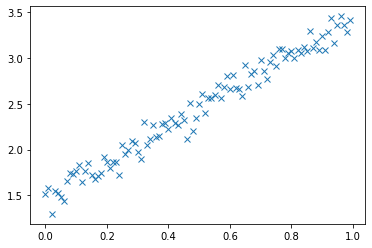

None


In [122]:
plt.clf()
plt.plot(x.makeNumpyArray(), y.makeNumpyArray(), marker: "x", linestyle: "")
plt.show()

### The cost function

In [123]:
// print(y.shape[0])

func cost(y: Tensor<Float>, predictions: Tensor<Float>) -> Float? {
  let m: Float = Float(y.shape[0])
  let scalar = Tensor<Float>(Float(1.0) / (Float(2.0) * m))
  print(scalar)
  return Float(scalar * (y - predictions).squared().sum())
}

### Initializing the model

In [124]:
var Θ = Tensor<Float>(randomNormal: [2, 1])
let x_bias = Tensor<Float>(ones: [100, 1]).concatenated(with: x.reshaped(to: [100, 1]), alongAxis: 1)

### Training the model

In [129]:
let lr: Float = 0.01
let m = Float(y.shape[0])
for _ in 0...1500 {
  Θ -= (lr/m) * x_bias.transposed() • ((x_bias • Θ) - y.reshaped(to: [100, 1]))
}

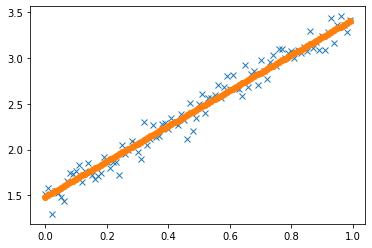

None


In [135]:
plt.clf()
// plot the actual values
plt.plot(x.makeNumpyArray(), y.makeNumpyArray(), label:"True data", marker: "x", linestyle: "") 

// plot the predictions
plt.plot(x.makeNumpyArray(), Θ[1].makeNumpyArray() * x.makeNumpyArray() + Θ[0].makeNumpyArray(), label:"Prediction", marker: "o", linestyle: ":")
plt.show()